# CAR PURCHASE PREDICTION

#### Predicting whether the costumer will purchase the car or not. ####

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

## DATA

In [34]:
df = pd.read_csv('DATA/car_data.csv')
df.head()

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User ID       1000 non-null   int64 
 1   Gender        1000 non-null   object
 2   Age           1000 non-null   int64 
 3   AnnualSalary  1000 non-null   int64 
 4   Purchased     1000 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 39.2+ KB


In [36]:
df.describe()

,User ID,Age,AnnualSalary,Purchased
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,40.106000,72689.000000,0.402000
std,288.819436,10.707073,34488.341867,0.490547
min,1.000000,18.000000,15000.000000,0.000000
25%,250.750000,32.000000,46375.000000,0.000000
50%,500.500000,40.000000,72000.000000,0.000000
75%,750.250000,48.000000,90000.000000,1.000000
max,1000.000000,63.000000,152500.000000,1.000000


#### Drop 'User ID' since we won't use it for model. ####

In [37]:
df.drop('User ID', axis=1, inplace=True)

#### Convert 'Gender' column to numeric column. ####

In [38]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [39]:
df['Gender'] = df['Gender'].apply(lambda g: 1 if g=="Male" else 0)
df

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
...,...,...,...,...
995,1,38,59000,0
996,0,47,23500,0
997,0,28,138500,1
998,0,48,134000,1


#### Correlation ####

<AxesSubplot: >

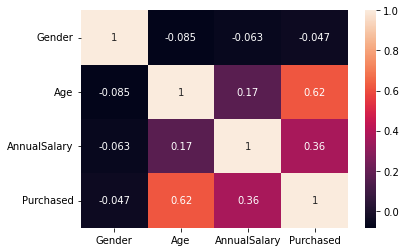

In [40]:
sns.heatmap(data=df.corr(), annot=True)

In [41]:
df.corr()['Purchased'].sort_values()

Gender         -0.047211
AnnualSalary    0.364974
Age             0.616036
Purchased       1.000000
Name: Purchased, dtype: float64

### PREPARING THE DATA BEFORE THE TRAINING

In [42]:
X = df.drop('Purchased', axis=1)
y = df['Purchased']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### MODEL RAINING

In [43]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(scaled_X_train, y_train)

LogisticRegression()

#### PERFORMANCE EVALUATION

In [44]:
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

##### TRAIN DATA

In [45]:
train_y_hat = model.predict(scaled_X_train)
print(classification_report(y_train, train_y_hat))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       412
           1       0.84      0.74      0.79       288

    accuracy                           0.84       700
   macro avg       0.84      0.82      0.83       700
weighted avg       0.84      0.84      0.83       700



##### TEST DATA

In [46]:
test_y_hat = model.predict(scaled_X_test)
print(classification_report(y_test, test_y_hat))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       186
           1       0.82      0.74      0.77       114

    accuracy                           0.84       300
   macro avg       0.83      0.82      0.82       300
weighted avg       0.84      0.84      0.83       300



#### Confusion Matrix

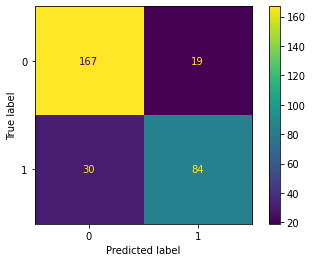

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, test_y_hat)

#### ROC Curve

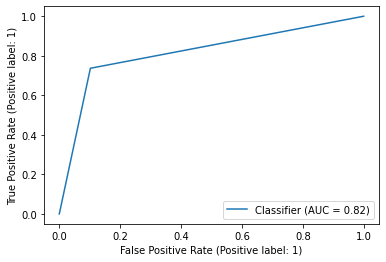

In [48]:
RocCurveDisplay.from_predictions(y_test, test_y_hat)